<a href="https://colab.research.google.com/github/foxtrotmike/CS909/blob/master/transformations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Let's try to understand how transformations of data points can help us solve non-linear classification problems. We will be focusing on how a transformation of a data point changes its distance and dot product with other data points. We will also see how the transformed data can become linearly separably with a cleverly chosen transform. The goal is to build towards a deeper understanding of kernels.

Let's begin with importing some useful plotting functions.

In [3]:
import numpy as np
from sklearn.svm import LinearSVC as Classifier
import numpy as np
import matplotlib.pyplot as plt
import itertools
from numpy.random import randn #importing randn
import numpy as np #importing numpy
import matplotlib.pyplot as plt #importing plotting module
import itertools
import warnings
from mpl_toolkits.mplot3d import Axes3D
def plotit(X,Y=None,clf=None,  conts = None, ccolors = ('b','k','r'), colors = ('c','y'), markers = ('s','o'), hold = False, transform = None,extent = None,**kwargs):
    """
    A function for showing data scatter plot and classification boundary
    of a classifier for 2D data
        X: nxd  matrix of data points
        Y: (optional) n vector of class labels
        clf: (optional) classification/discriminant function handle
        conts: (optional) contours (if None, contours are drawn for each class boundary)
        ccolors: (optional) colors for contours
        colors: (optional) colors for each class (sorted wrt class id)
            can be 'scaled' or 'random' or a list/tuple of color ids
        markers: (optional) markers for each class (sorted wrt class id)
        hold: Whether to hold the plot or not for overlay (default: False).
        transform: (optional) a function handle for transforming data before passing to clf
        kwargs: any keyword arguments to be passed to clf (if any)
    """
    if clf is not None and X.shape[1]!=2:
        warnings.warn("Data Dimensionality is not 2. Unable to plot.")
        return
    if markers is None:
        markers = ('.',)
    eps=1e-6
    d0,d1 = (0,1)
    if extent is None:
        minx, maxx = np.min(X[:,d0])-eps, np.max(X[:,d0])+eps
        miny, maxy = np.min(X[:,d1])-eps, np.max(X[:,d1])+eps
        extent = [minx,maxx,miny,maxy]
    else:
        [minx,maxx,miny,maxy] = extent
    if Y is not None:
        classes = sorted(set(Y))
        if conts is None:
            conts = list(classes)
        vmin,vmax = classes[0]-eps,classes[-1]+eps
    else:
        vmin,vmax=-2-eps,2+eps
        if conts is None:
            conts = sorted([-1+eps,0,1-eps])

    if clf is not None:
        npts = 150
        x = np.linspace(minx,maxx,npts)
        y = np.linspace(miny,maxy,npts)
        t = np.array(list(itertools.product(x,y)))
        if transform is not None:
            t = transform(t)
        z = clf(t,**kwargs)

        z = np.reshape(z,(npts,npts)).T


        plt.contour(x,y,z,conts,linewidths = [2],colors=ccolors,extent=extent, label='f(x)=0')
        #plt.imshow(np.flipud(z), extent = extent, cmap=plt.cm.Purples, vmin = -2, vmax = +2); plt.colorbar()
        plt.pcolormesh(x, y, z,cmap=plt.cm.Purples,vmin=vmin,vmax=vmax);plt.colorbar()
        plt.axis(extent)

    if Y is not None:
        for i,y in enumerate(classes):
            if colors is None or colors=='scaled':
                cc = np.array([[i,i,i]])/float(len(classes))
            elif colors =='random':
                cc = np.array([[np.random.rand(),np.random.rand(),np.random.rand()]])
            else:
                cc = colors[i%len(colors)]
            mm = markers[i%len(markers)]
            plt.scatter(X[Y==y,d0],X[Y==y,d1], marker = mm,c = cc, s = 30)

    else:
        plt.scatter(X[:,d0],X[:,d1],marker = markers[0], c = 'k', s = 5)
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    if not hold:
        plt.grid()
        plt.show()
    return extent



Let's take some data and try to classify it with a linear support vector machine. Note that the classification problem is not linearly separable. Consequently, the SVM will not be able to classify it.

Coefficients before Transformation: [[2.73466420e-05 6.89368863e-05]] [5.85808712e-06]
Predictions before Transformation: [1 1 1 1]


<ipython-input-3-2a41d0ed9c7d>:63: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(x,y,z,conts,linewidths = [2],colors=ccolors,extent=extent, label='f(x)=0')


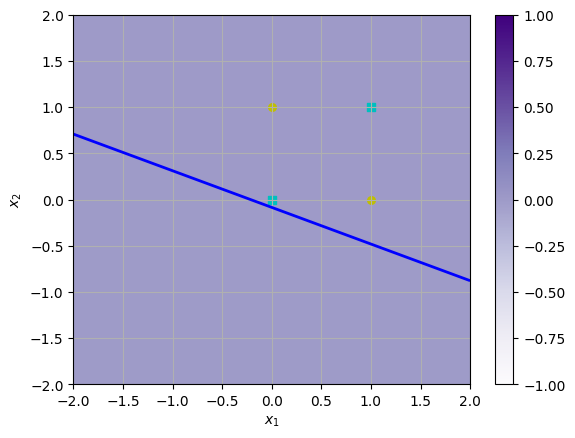

[-2, 2, -2, 2]

In [5]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y =np.array([-1,1,1,-1])
clf2d = Classifier(C=10).fit(X, y)
f = clf2d.predict(X)
print('Coefficients before Transformation:', clf2d.coef_,clf2d.intercept_)
print('Predictions before Transformation:',f)
plt.figure(); plotit(X,y,clf = clf2d.decision_function,conts=[0],extent=[-2,+2,-2,+2])

Next let's use a transform and transform the data and then try to classify the transformed data with a linear support vector classifier. Notice how after the transform the data becomes linearly separable. You may want to run this code in a python IDE rather than a notebook to be able to interact with the 3D plot which shows a plane separating the two classes.

[[0.         0.         0.        ]
 [0.         1.         0.        ]
 [1.         0.         0.        ]
 [1.         1.         1.41421356]]
Coefficients after Transformation: [[ 1.56325039  1.56311099 -2.34676164]] [-0.72438347]
Predictions after Transformation: [-1  1  1 -1]


<ipython-input-3-2a41d0ed9c7d>:63: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(x,y,z,conts,linewidths = [2],colors=ccolors,extent=extent, label='f(x)=0')


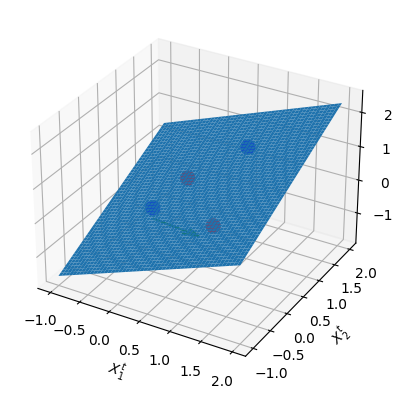

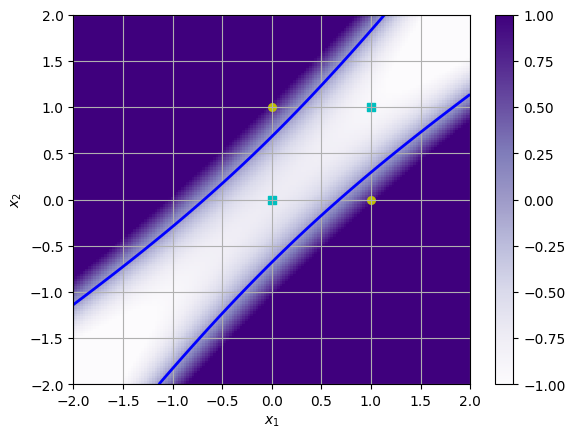

[-2, 2, -2, 2]

In [6]:

transform = lambda x: np.hstack((x**2,np.atleast_2d(np.sqrt(2)*x[:,0]*x[:,1]).T))
Xt = transform(X)
print(Xt)
clf = Classifier(C=10).fit(Xt, y)
f = clf.predict(Xt)
print('Coefficients after Transformation:',clf.coef_,clf.intercept_)
print('Predictions after Transformation:',f)


# showing the plane in 3d
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
xx,yy = np.arange(-1, 2, 0.01), np.arange(-1, 2, 0.01)
yy = xx, yy = np.meshgrid(xx, yy)
zz = -(clf.coef_[0,0]*xx+clf.coef_[0,1]*yy+clf.intercept_[0])/(clf.coef_[0,2])
fig = plt.figure(); ax = fig.add_subplot(111, projection='3d')
Xp,Xn = Xt[y==1,:],Xt[y!=1,:]
ax.scatter(Xp[:,0], Xp[:,1], Xp[:,2],color = 'red',alpha=1,s=100)
ax.scatter(Xn[:,0], Xn[:,1], Xn[:,2],color = 'blue',alpha=1,s=100)
ax.plot_surface(xx, yy, zz,linewidth=0, antialiased=True)
ax.set_xlabel('$X^t_1$'); ax.set_ylabel('$X^t_2$'); ax.set_zlabel('$X^t_3$')
# Normal vector (coef_ of the SVM)
normal_vector = clf.coef_[0]
start_point = [0, 0, -clf.intercept_[0] / clf.coef_[0,2]]
ax.quiver(start_point[0], start_point[1], start_point[2],
          normal_vector[0], normal_vector[1], normal_vector[2], length=1, color='green', normalize=True)

# showing the boundary in 2d
plt.figure(); plotit(X,y,clf = clf.decision_function,transform = transform,conts=[0],extent=[-2,+2,-2,+2])

 Notice how the generated boundary which appears as a plane in the 3D transformed space maps to a non-linear boundary in the original 2D feature space.

Let's calculate the pairwise distance matrix before and after the transformation.

In [8]:
from scipy.spatial.distance import pdist, squareform
D = squareform(pdist(X,metric='sqeuclidean'))
Dt = squareform(pdist(Xt,metric='sqeuclidean'))
print("Pairwise Distance matrix before transformation: \n ", D)
print("Pairwise Distance matrix after transformation: \n", Dt)


Pairwise Distance matrix before transformation: 
  [[0. 1. 1. 2.]
 [1. 0. 2. 1.]
 [1. 2. 0. 1.]
 [2. 1. 1. 0.]]
Pairwise Distance matrix after transformation: 
 [[0. 1. 1. 4.]
 [1. 0. 2. 3.]
 [1. 2. 0. 3.]
 [4. 3. 3. 0.]]


Let's see how the transformation affects the dot products. Notice how the dot-product values after transformations are squares of the dot-product values before transformation.

In [11]:
K = np.dot(X,X.T)
Kt = np.dot(Xt,Xt.T)
print("Pairwise dot-product (kernel) matrix before transformation: \n ", K)
print("Pairwise dot-product (kernel) matrix after transformation: \n ", Kt)

Pairwise dot-product (kernel) matrix before transformation: 
  [[0 0 0 0]
 [0 1 0 1]
 [0 0 1 1]
 [0 1 1 2]]
Pairwise dot-product (kernel) matrix after transformation: 
  [[0. 0. 0. 0.]
 [0. 1. 0. 1.]
 [0. 0. 1. 1.]
 [0. 1. 1. 4.]]


I hope you have now understood that:
1. When we apply a transformation to the data, it can make the problem linearly separable

2. When we apply a transformation to the data, it changes the distance between examples (akin to folding a piece of paper)

3. When we apply a transformation to the data, it changes the dot-product between examples

4. Thus, if I can change the definition of the dot-product to a generalized kernel function, then this will lead to a change in the values of the dot-product and would change the definition of distance between examples and would be equivalent to a transformation of the data which can help make a non-linear classification problem linearly separable in the transformed space (or achieving a fold of the space on which the data points lie)!!


Can you try other transforms to see their impact?


(c) Fayyaz Minhas.